In [1]:
import pandas as pd
import numpy as np

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\data\clean\after_step_3a_outliers_cat.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')





FileNotFoundError: [Errno 2] No such file or directory: 'C:\\repos\\immo-eliza-team6-analysis\\data\\clean\\after_step_3a_outliers_cat.csv'

In [11]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df['Postal_code']= df['Postal_code'].astype('string')
df['post_1'] = df['Postal_code'].str[0]
df['post_2'] = df['Postal_code'].str[0:2]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5756 non-null   int64   
 1   locality_name       5756 non-null   category
 2   Postal_code         5756 non-null   string  
 3   Price               5756 non-null   int64   
 4   Subtype             5756 non-null   category
 5   Number_of_bedrooms  5756 non-null   int64   
 6   Living_area         5756 non-null   int64   
 7   street              5756 non-null   category
 8   number              5738 non-null   category
 9   latitude            5753 non-null   float64 
 10  longitude           5753 non-null   float64 
 11  Open_fire           5756 non-null   int64   
 12  Swimming_Pool       5756 non-null   int64   
 13  hasTerrace          5756 non-null   int64   
 14  terraceSurface      5756 non-null   int64   
 15  gardenSurface       5756 non-null   in

In [27]:
df.describe(include='all')

c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City
count,5.756000e+03,5756,5756.000000,5.756000e+03,5756,5756.000000,5756.000000,5756,5738,5753.000000,5753.000000,5756.000000,5756.000000,5756.000000,5756.000000,5756.000000,3576,5756.000000,5756,5756.000000,5756,4904.000000,5756.000000,4904.000000,5756,1625,5756
unique,NaN,1123,NaN,NaN,1,NaN,NaN,4210,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,5,NaN,6,NaN,NaN,NaN,11,10,1
top,NaN,Gent,NaN,NaN,House,NaN,NaN,Stationsstraat,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Installed,NaN,Good,NaN,F,NaN,NaN,NaN,East Flanders,Ghent,True
freq,NaN,197,NaN,NaN,5756,NaN,NaN,37,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1878,NaN,2812,NaN,1556,NaN,NaN,NaN,1701,360,5756
mean,1.901411e+07,NaN,6115.607540,4.451096e+05,NaN,3.469076,198.164524,NaN,NaN,50.889882,4.172868,0.058200,0.022064,0.682418,10.247915,203.228631,NaN,2.296213,NaN,0.011466,NaN,774.627651,2282.183698,inf,NaN,NaN,NaN
std,3.005346e+06,NaN,3172.687581,4.017626e+05,NaN,1.202336,105.412579,NaN,NaN,0.324784,0.755026,0.234142,0.146904,0.465576,46.718610,1237.078238,NaN,1.405460,NaN,0.106474,NaN,2278.504648,1259.781822,NaN,NaN,NaN,NaN
min,9.542242e+06,NaN,1000.000000,4.000000e+04,NaN,1.000000,27.000000,NaN,NaN,49.507785,2.585809,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,186.935372,13.550136,NaN,NaN,NaN
25%,2.010933e+07,NaN,2840.000000,2.700000e+05,NaN,3.000000,140.000000,NaN,NaN,50.791546,3.630446,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,174.000000,1615.667222,511.605199,NaN,NaN,NaN
50%,2.019034e+07,NaN,6998.500000,3.690000e+05,NaN,3.000000,174.000000,NaN,NaN,50.936291,4.152761,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,350.000000,2108.177802,993.572151,NaN,NaN,NaN
75%,2.022664e+07,NaN,9050.000000,4.950000e+05,NaN,4.000000,223.000000,NaN,NaN,51.091370,4.574898,0.000000,0.000000,1.000000,15.000000,126.000000,NaN,3.000000,NaN,0.000000,NaN,750.000000,2682.053292,1971.280678,NaN,NaN,NaN


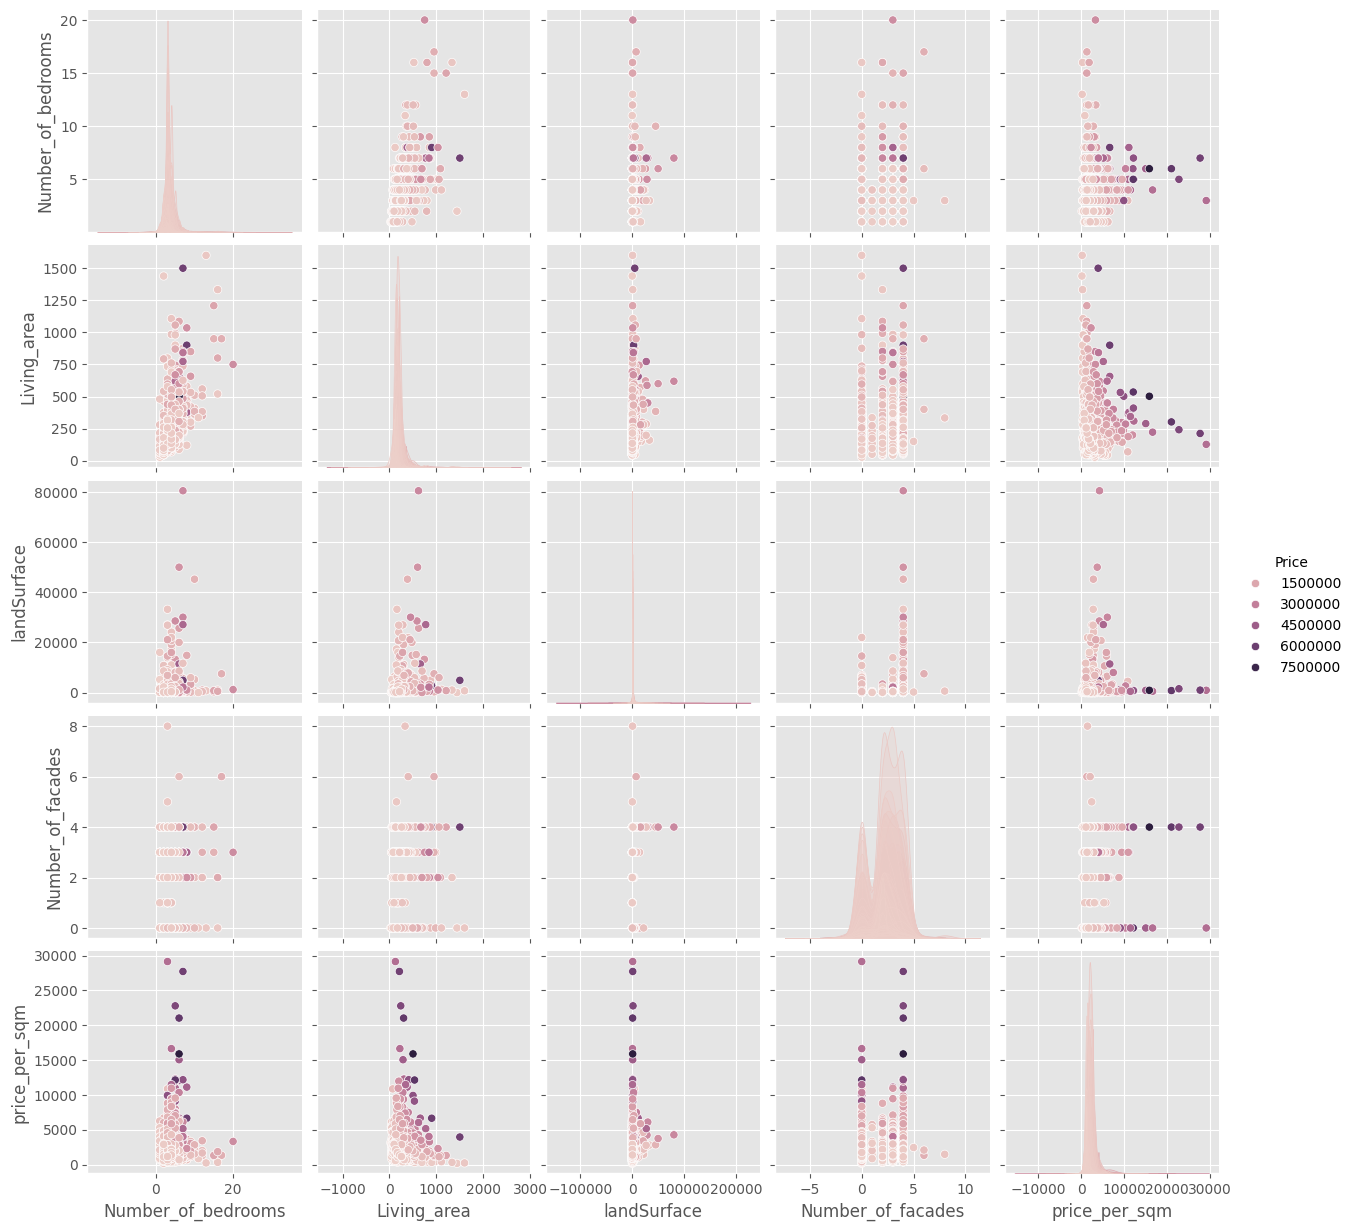

In [14]:
cols_to_plot = ['Number_of_bedrooms', 'Living_area', 'landSurface', 'Number_of_facades', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='Price')
plt.show()



In [32]:
# Ensure 'Postal_code' is converted to integer for comparison
df['Postal_code'] = df['Postal_code'].astype(int)

# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if (1500 < x < 4000) or (8000 < x <= 9999) else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes (compare integers)
df['region'] = df.apply(
    lambda row: 'Brussels' if 1000 < row['Postal_code'] < 1300 else row['region'], axis=1
)
# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True,Flanders
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,4.047057,0,0,1,40,32,Installed,3,Good,0,C,NaN,1600.000000,NaN,Brabant_Wallon,NaN,True,Flanders


<Axes: xlabel='Province', ylabel='Count'>

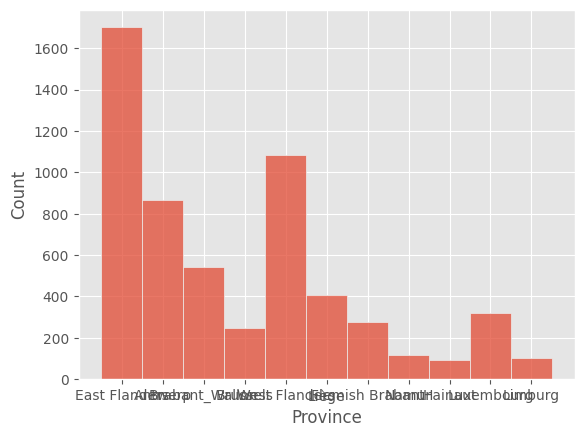

In [34]:
sns.histplot(df, x= 'Province')

[(0.0, 900000.0)]

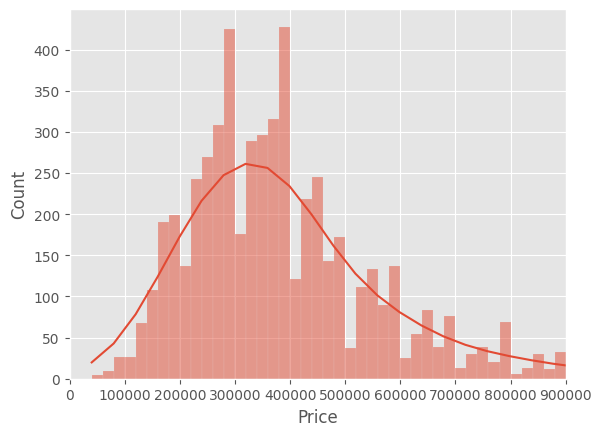

In [41]:
plotx= sns.histplot(df, x= 'Price', kde=True, binwidth=20000, binrange=(0, 900000)
                    )
plotx.set(xlim=(0, 900000))

[(0.0, 800000.0)]

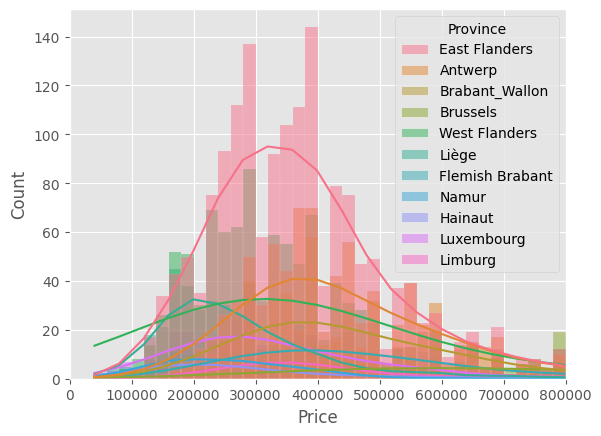

In [46]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Province", binwidth=20000, binrange=(0, 900000))
plotx.set(xlim=(0, 800000))

[(0.0, 800000.0)]

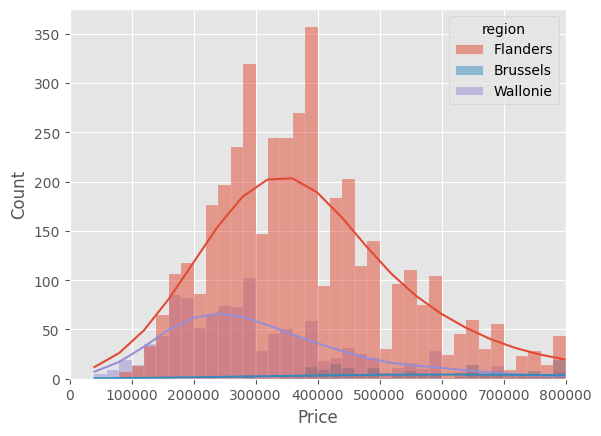

In [49]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 900000))
plotx.set(xlim=(0, 800000))

In [ ]:

# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)



In [35]:
# Step 1: Filter postal codes with at least 5 records
postal_code_counts = avg_price_per_postal_code['Postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 5].index

filtered_data = avg_price_per_postal_code[avg_price_per_postal_code['Postal_code'].isin(valid_postal_codes)]

# Step 2: Get max avg price per region
max_avg_price_per_region = filtered_data.loc[
    filtered_data.groupby('region')['Price'].idxmax()
]

print(max_avg_price_per_region)

Empty DataFrame
Columns: [region, Postal_code, Price]
Index: []


In [23]:
# Group by region and postal code, then calculate the median price
median_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].median().reset_index()

# Find the postal code with the highest median price per region
max_median_price_per_region = median_price_per_postal_code.loc[
    median_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_median_price_per_region)

       region Postal_code     Price
13   Brussels        1150  700000.0
416  Flanders        9667  775000.0
580  Wallonie        5031  749000.0


In [68]:
df_filtered = df[df['Postal_code'] == '1000']
df_filtered.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm,post_1,post_2,region
1062,20234969,Bruxelles,1000,479000,House,5,220,Rue Du Houblon,52,50.851363,4.340258,0,0,0,0,0,Semi equipped,2,To be done up,0,F,2177.272727,1,10,Wallonie
1547,20245879,Bruxelles,1000,675000,House,6,365,Rue Des Fabriques,15,50.848628,4.341896,0,0,1,17,0,NaN,2,To renovate,0,G,1849.315068,1,10,Wallonie
2350,20186118,Brussels,1000,475000,House,2,165,Rue De La Bougie,37,50.847423,4.334863,0,0,0,0,0,Installed,2,Good,0,F,2878.787879,1,10,Wallonie
2821,20175696,Bruxelles,1000,550000,House,6,248,Rue Jenneval,33,50.848379,4.387859,0,0,1,0,53,Not installed,2,To renovate,0,G,2217.741935,1,10,Wallonie


In [25]:
# Group by region and postal code, then calculate the average price per sqm
avg_price_per_sqm_per_postal_code = df.groupby(['region', 'Postal_code'])['price_per_sqm'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_sqm_per_region = avg_price_per_sqm_per_postal_code.loc[
    avg_price_per_sqm_per_postal_code.groupby('region')['price_per_sqm'].idxmax()
]

# Display the result
print(max_avg_price_per_sqm_per_region)

       region Postal_code  price_per_sqm
13   Brussels        1150    3442.853107
69   Flanders        1950    3472.942393
459  Wallonie        1325    3323.181388


In [26]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

## 


     region       Price
0  Brussels  557,816.13
1  Flanders  395,159.62
2  Wallonie  316,992.65


https://postcode.nationaal.be/

https://www.notaris.be/vastgoedprijzen

tgoedprijzen

In [27]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,815.55
1  Flanders      2,175.19
2  Wallonie      1,943.33
